# Boosting Algoritmaları

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("dataset/vgsales.csv")

In [60]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [61]:
df = df.dropna(axis=0)

In [65]:
sum(df['Year'].isna())

0

In [66]:
df['Year'] = df['Year'].apply(lambda x: int(x))

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [68]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [69]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10596,10598,[Prototype 2],PC,2012,Action,Activision,0.07,0.02,0.0,0.01,0.10
12077,12079,Robot Alchemic Drive,PS2,2002,Action,Enix Corporation,0.03,0.03,0.0,0.01,0.07
13641,13643,Fashion Week Jr. Designer,DS,2009,Simulation,505 Games,0.04,0.00,0.0,0.00,0.04
3458,3460,NCAA Football 09,PS3,2008,Sports,Electronic Arts,0.54,0.00,0.0,0.04,0.58
7856,7858,The Amazing Spider-Man (Console Version),3DS,2012,Action,Activision,0.15,0.03,0.0,0.01,0.19


In [7]:
df['Platform'].value_counts().to_frame().T

,DS,PS2,PS3,Wii,X360,PSP,PS,PC,XB,GBA,...,GB,DC,GEN,NG,SCD,WS,3DO,TG16,GG,PCFX
Platform,2163,2161,1329,1325,1265,1213,1196,960,824,822,...,98,52,27,12,6,6,3,2,1,1


<AxesSubplot:>

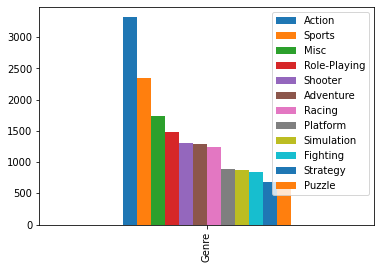

In [18]:
df['Genre'].value_counts().to_frame().T.plot(kind='bar');

In [20]:
df['Publisher'].value_counts().to_frame().T

,Electronic Arts,Activision,Namco Bandai Games,Ubisoft,Konami Digital Entertainment,THQ,Nintendo,Sony Computer Entertainment,Sega,Take-Two Interactive,...,Mitsui,Milestone,Abylight,Glams,Locus,Warp,New,Elite,Evolution Games,UIG Entertainment
Publisher,1351,975,932,921,832,715,703,683,639,413,...,1,1,1,1,1,1,1,1,1,1


In [10]:
df['Year'].value_counts().to_frame().T

,2009.0,2008.0,2010.0,2007.0,2011.0,2006.0,2005.0,2002.0,2003.0,2004.0,...,1989.0,1983.0,1990.0,1987.0,1988.0,1985.0,1984.0,1980.0,2017.0,2020.0
Year,1431,1428,1259,1202,1139,1008,941,829,775,763,...,17,17,16,16,15,14,14,9,3,1


In [13]:
np.mean(df['Global_Sales'].values)

0.5374406555006628

In [14]:
df['Global_Sales'].values

array([8.274e+01, 4.024e+01, 3.582e+01, ..., 1.000e-02, 1.000e-02,
       1.000e-02])

In [70]:
df.sample(25)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4269,4271,Jampack Winter 2003 (RP-M),PS2,2003,Misc,Sony Computer Entertainment,0.22,0.18,0.00,0.06,0.46
4430,4432,Plants vs. Zombies: Garden Warfare 2,XOne,2016,Shooter,Electronic Arts,0.26,0.15,0.00,0.04,0.44
6030,6032,War Gods,N64,1997,Fighting,Midway Games,0.23,0.06,0.00,0.00,0.29
1760,1762,Plants vs. Zombies: Garden Warfare,X360,2014,Shooter,Electronic Arts,0.51,0.54,0.00,0.10,1.16
9273,9275,Touch My Katamari,PSV,2011,Puzzle,Namco Bandai Games,0.08,0.04,0.00,0.02,0.14
6130,6132,Tony Hawk: Shred,PS3,2010,Sports,Activision,0.18,0.07,0.00,0.04,0.28
7902,7904,Escape The Museum,DS,2010,Adventure,Astragon,0.05,0.12,0.00,0.02,0.19
2843,2845,Kangaroo,2600,1982,Platform,Atari,0.67,0.04,0.00,0.01,0.72
6210,6212,Danganronpa Another Episode: Ultra Despair Girls,PSV,2014,Action,Nippon Ichi Software,0.10,0.03,0.12,0.04,0.28
9627,9629,Dynasty Warriors: Gundam Reborn,PSV,2013,Action,Namco Bandai Games,0.00,0.00,0.13,0.00,0.13


Data'yı predict genre olarak değiştirip model üretmeyi deneyeceğiz ^.^

In [73]:
df.drop(['Rank', 'Name'], axis=1, inplace=True)

In [74]:
df.sample(7)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
192,X360,2010,Role-Playing,Microsoft Game Studios,3.59,1.11,0.05,0.38,5.13
12398,WiiU,2015,Misc,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06
2070,PSV,2013,Shooter,Sony Computer Entertainment Europe,0.25,0.49,0.04,0.22,1.00
5607,X360,2007,Action,Vivendi Games,0.27,0.02,0.00,0.03,0.32
6889,PS3,2011,Misc,THQ,0.15,0.06,0.00,0.03,0.24
16242,PC,2007,Shooter,Vivendi Games,0.01,0.00,0.00,0.00,0.01
15926,PSP,2012,Action,D3Publisher,0.00,0.00,0.02,0.00,0.02


In [109]:
factorized_df = df.copy()
factorized_dict = {}

for column in ['Platform', 'Genre', 'Publisher']:
    values, keys = pd.factorize(df[f'{column}'])
    factorized_dict[column] = keys
    factorized_df[column] = values

Values: [0 1 0 ... 6 3 8]	Keys: Index(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS',
       'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU',
       'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object')
Values: [0 1 2 ... 2 4 1]	Keys: Index(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
      dtype='object')
Values: [  0   0   0 ...   4 505 169]	Keys: Index(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       ...
       'Nitroplus', 'Paradox Development', 'Otomate', 'Ongakukan', 'Commseed',
       'Inti Creates', 'Takuyo', 'Interchannel-Holon', 'Rain Games',
       'UIG Entertainment'],
      dtype='object', length=576)


In [110]:
factorized_df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,2006,0,0,41.49,29.02,3.77,8.46,82.74
1,1,1985,1,0,29.08,3.58,6.81,0.77,40.24
2,0,2008,2,0,15.85,12.88,3.79,3.31,35.82
3,0,2009,0,0,15.75,11.01,3.28,2.96,33.00
4,2,1996,3,0,11.27,8.89,10.22,1.00,31.37


In [111]:
factorized_dict['Genre'][0]

'Sports'

In [117]:
import pickle

In [122]:
with open("cat_values.pickle", 'wb') as file:
    pickle.dump(factorized_dict, file)

**Normalize Sale values** -> `NA_Sales` - `EU_Sales` - `JP_Sales` - `Other_Sales` - `Global_Sales`

In [123]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [131]:
normalize_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

In [132]:
orj_norm_col_vals = df[normalize_cols].values
orj_norm_col_vals_scaled = min_max_scaler.fit_transform(orj_norm_col_vals)

In [142]:
factorized_df[normalize_cols] = orj_norm_col_vals_scaled
factorized_df.sample(7)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8948,13,2006,0,7,0.002651,0.001034,0.000000,0.000946,0.001692
7735,5,2012,2,34,0.000482,0.004480,0.000000,0.003784,0.002176
11981,11,1997,2,49,0.001446,0.000345,0.000000,0.000000,0.000725
12819,4,2008,5,399,0.001205,0.000000,0.000000,0.000000,0.000604
6108,6,2008,5,3,0.003374,0.003790,0.000000,0.003784,0.003264
16520,16,2006,3,67,0.000000,0.000000,0.000978,0.000000,0.000000
6374,13,2002,2,7,0.004820,0.002068,0.000000,0.000946,0.003143


In [144]:
factorized_df.to_csv("dataset/transformed_vgsales.csv")